In [54]:
import carla
import numpy as np
import cv2
import time
import sys
sys.path.append('F:\CARLA\Windows\CARLA_0.9.15\PythonAPI\carla') # tweak to where you put carla
from agents.navigation.global_route_planner import GlobalRoutePlanner
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

In [2]:
client = carla.Client('localhost', 2000)

world = client.get_world()

blueprints = [bp for bp in world.get_blueprint_library().filter('*')]
spawn_points = world.get_map().get_spawn_points()

In [3]:
vehicle_bp = world.get_blueprint_library().filter('*mini*')

In [80]:
vehicle_start_point = spawn_points[1]
vehicle = world.try_spawn_actor(vehicle_bp[0], vehicle_start_point)

In [79]:
for actor in world.get_actors().filter('*vehicle*'):
    actor.destroy()
for sensor in world.get_actors().filter('*sensor*'):
    sensor.destroy()

In [81]:
targetid = 27
targetPoint = spawn_points[targetid]

point_A = vehicle_start_point.location
point_B = targetPoint.location


sampling_resolution = 1
grp = GlobalRoutePlanner(world.get_map(), sampling_resolution)


route = grp.trace_route(point_A, point_B)
print(route[0][0])

for index, waypoint in enumerate(route):
        # Draw a string with an ID at the location of each spawn point
        point_id = f'ID: {index}'
        world.debug.draw_string(
            waypoint[0].transform.location,
            point_id,
            draw_shadow=False,
            color=carla.Color(r=255, g=255, b=255),
            life_time=120,  # Set to 0 to make it persist indefinitely
            persistent_lines=True
        )
        #drawn_points.append(point)

Waypoint(Transform(Location(x=-66.835869, y=27.998329, z=0.000000), Rotation(pitch=0.000000, yaw=0.159198, roll=0.000000)))


#### How will it look?

In the next segment, the path calculation will take place. Wi will locally calculate where will be a car in X time steps into the future - potentially - In the real world it should be done with something like the Kalman Filter, but here, to that it works, we cam use the basic dinamics of the car.

(<carla.libcarla.Waypoint object at 0x0000017F582D05D0>, <RoadOption.LANEFOLLOW: 4>)
[ 1  2  3  4  5  6  7  0  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29 31 32 33 35 36 37]


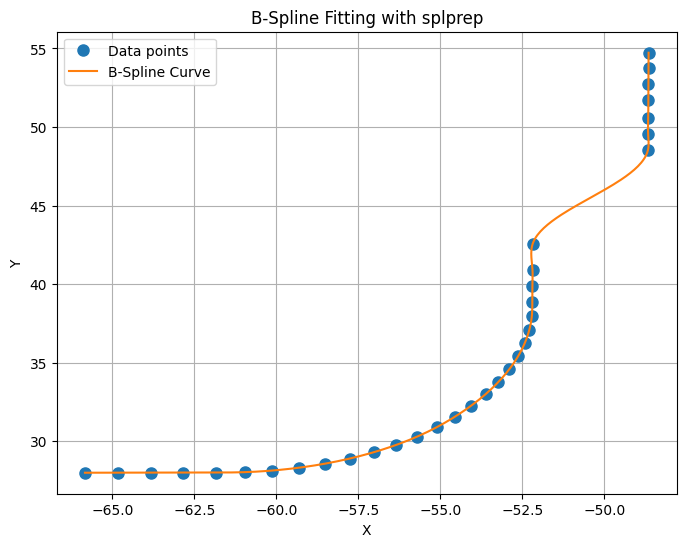

[-59.32092667 -65.83587646 -64.83587646 -63.83588409 -62.83588791
 -61.83589172 -60.96198273 -60.13477707 -59.32092667 -58.52777481
 -57.76247406 -57.03193283 -56.34273911 -55.70111465 -55.11284256
 -54.56595612 -54.0645256  -53.61802673 -53.22900772 -52.89969635
 -52.6319809  -52.42738342 -52.28708267 -52.21187973 -52.19707108
 -52.19425583 -52.19144058 -52.18673706 -52.18673706 -48.66986084
 -48.66986084 -48.66704941 -48.66423416 -48.66094208 -48.66094208
 -48.65812683 -48.6553154  -48.65250015]
[28.31806374 28.00110817 28.00388527 28.00666428 28.00944328 28.01222229
 28.03720093 28.13861847 28.31806374 28.57391548 28.90386772 29.30494308
 29.77351952 30.30537415 30.89570618 31.55471611 32.26249695 33.00615311
 33.78142929 34.58388901 35.40894318 36.25187302 37.10784912 37.97198868
 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589
 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388
 53.7252388  54.72523117]
(<carla.libcarla.Waypoint object a

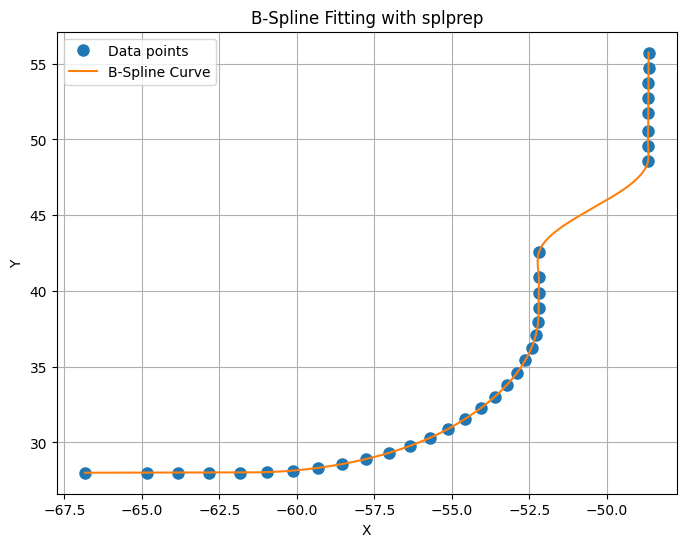

[-66.83586884 -64.83587646 -63.83588409 -62.83588791 -61.83589172
 -60.96198273 -60.13477707 -59.32092667 -58.52777481 -57.76247406
 -57.03193283 -56.34273911 -55.70111465 -55.11284256 -54.56595612
 -54.0645256  -53.61802673 -53.22900772 -52.89969635 -52.6319809
 -52.42738342 -52.28708267 -52.21187973 -52.19707108 -52.19425583
 -52.19144058 -52.18673706 -52.18673706 -48.66986084 -48.66986084
 -48.66704941 -48.66423416 -48.66094208 -48.66094208 -48.65812683
 -48.6553154  -48.65250015 -48.64968491]
[27.99832916 28.00388527 28.00666428 28.00944328 28.01222229 28.03720093
 28.13861847 28.31806374 28.57391548 28.90386772 29.30494308 29.77351952
 30.30537415 30.89570618 31.55471611 32.26249695 33.00615311 33.78142929
 34.58388901 35.40894318 36.25187302 37.10784912 37.97198868 38.89096451
 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589
 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388
 54.72523117 55.72523117]
(<carla.libcarla.Waypoint object at

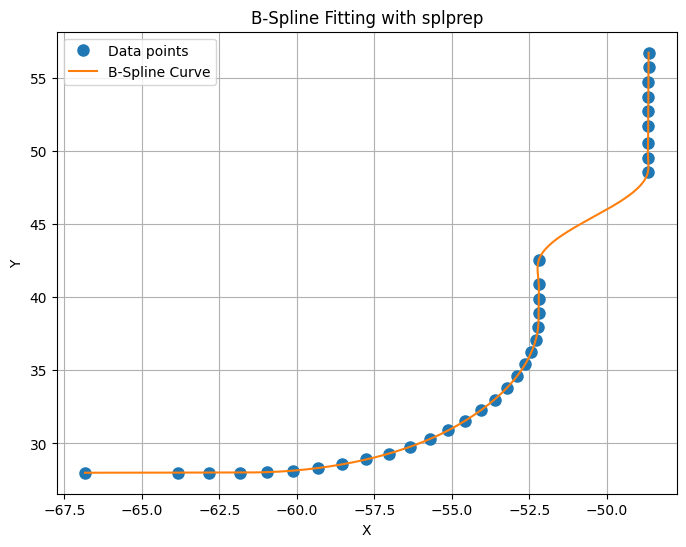

[-66.83586884 -63.83588409 -62.83588791 -61.83589172 -60.96198273
 -60.13477707 -59.32092667 -58.52777481 -57.76247406 -57.03193283
 -56.34273911 -55.70111465 -55.11284256 -54.56595612 -54.0645256
 -53.61802673 -53.22900772 -52.89969635 -52.6319809  -52.42738342
 -52.28708267 -52.21187973 -52.19707108 -52.19425583 -52.19144058
 -52.18673706 -52.18673706 -48.66986084 -48.66986084 -48.66704941
 -48.66423416 -48.66094208 -48.66094208 -48.65812683 -48.6553154
 -48.65250015 -48.64968491 -48.64687347]
[27.99832916 28.00666428 28.00944328 28.01222229 28.03720093 28.13861847
 28.31806374 28.57391548 28.90386772 29.30494308 29.77351952 30.30537415
 30.89570618 31.55471611 32.26249695 33.00615311 33.78142929 34.58388901
 35.40894318 36.25187302 37.10784912 37.97198868 38.89096451 39.89096069
 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208
 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117
 55.72523117 56.72522354]
(<carla.libcarla.Waypoint object at

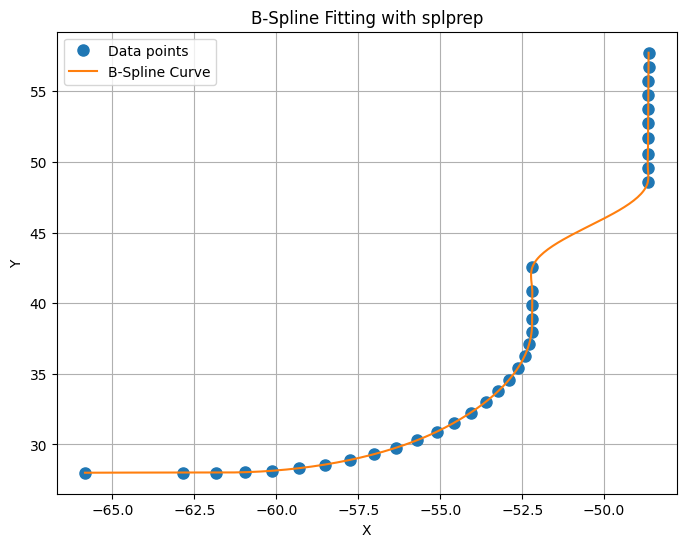

[-65.83587646 -62.83588791 -61.83589172 -60.96198273 -60.13477707
 -59.32092667 -58.52777481 -57.76247406 -57.03193283 -56.34273911
 -55.70111465 -55.11284256 -54.56595612 -54.0645256  -53.61802673
 -53.22900772 -52.89969635 -52.6319809  -52.42738342 -52.28708267
 -52.21187973 -52.19707108 -52.19425583 -52.19144058 -52.18673706
 -52.18673706 -48.66986084 -48.66986084 -48.66704941 -48.66423416
 -48.66094208 -48.66094208 -48.65812683 -48.6553154  -48.65250015
 -48.64968491 -48.64687347 -48.64405823]
[28.00110817 28.00944328 28.01222229 28.03720093 28.13861847 28.31806374
 28.57391548 28.90386772 29.30494308 29.77351952 30.30537415 30.89570618
 31.55471611 32.26249695 33.00615311 33.78142929 34.58388901 35.40894318
 36.25187302 37.10784912 37.97198868 38.89096451 39.89096069 40.89141464
 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826
 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117
 56.72522354 57.72522354]
(<carla.libcarla.Waypoint object 

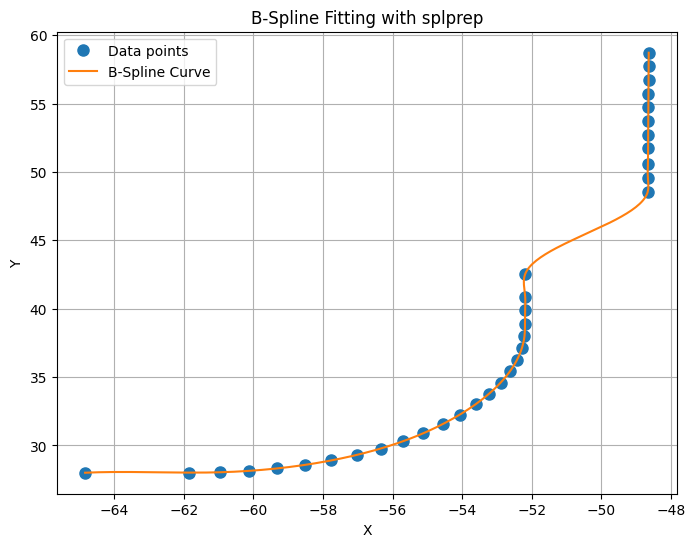

[-64.83587646 -61.83589172 -60.96198273 -60.13477707 -59.32092667
 -58.52777481 -57.76247406 -57.03193283 -56.34273911 -55.70111465
 -55.11284256 -54.56595612 -54.0645256  -53.61802673 -53.22900772
 -52.89969635 -52.6319809  -52.42738342 -52.28708267 -52.21187973
 -52.19707108 -52.19425583 -52.19144058 -52.18673706 -52.18673706
 -48.66986084 -48.66986084 -48.66704941 -48.66423416 -48.66094208
 -48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[28.00388336 28.01222229 28.03720093 28.13861847 28.31806374 28.57391548
 28.90386772 29.30494308 29.77351952 30.30537415 30.89570618 31.55471611
 32.26249695 33.00615311 33.78142929 34.58388901 35.40894318 36.25187302
 37.10784912 37.97198868 38.89096451 39.89096069 40.89141464 42.56512833
 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643
 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354
 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object 

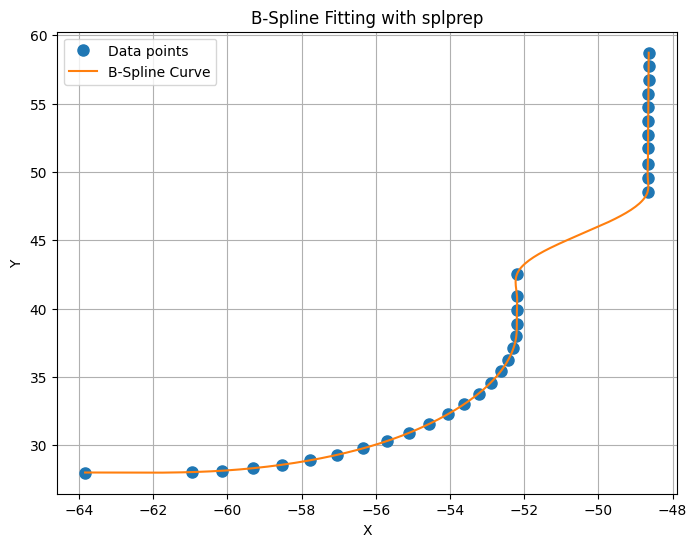

[-63.83588409 -60.96198273 -60.13477707 -59.32092667 -58.52777481
 -57.76247406 -57.03193283 -56.34273911 -55.70111465 -55.11284256
 -54.56595612 -54.0645256  -53.61802673 -53.22900772 -52.89969635
 -52.6319809  -52.42738342 -52.28708267 -52.21187973 -52.19707108
 -52.19425583 -52.19144058 -52.18673706 -52.18673706 -48.66986084
 -48.66986084 -48.66704941 -48.66423416 -48.66094208 -48.66094208
 -48.65812683 -48.6553154  -48.65250015 -48.64968491 -48.64687347
 -48.64405823 -48.64124298]
[28.00666428 28.03720093 28.13861847 28.31806374 28.57391548 28.90386772
 29.30494308 29.77351952 30.30537415 30.89570618 31.55471611 32.26249695
 33.00615311 33.78142929 34.58388901 35.40894318 36.25187302 37.10784912
 37.97198868 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833
 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643
 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354 57.72522354
 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951EED0>, <

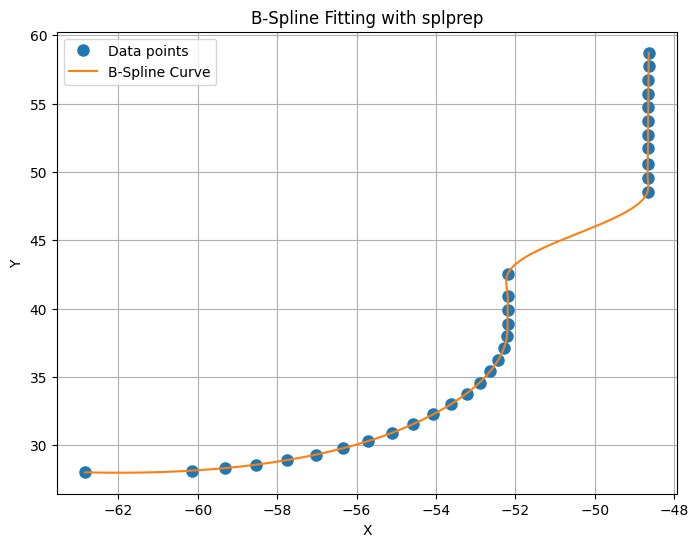

[-62.83588791 -60.13477707 -59.32092667 -58.52777481 -57.76247406
 -57.03193283 -56.34273911 -55.70111465 -55.11284256 -54.56595612
 -54.0645256  -53.61802673 -53.22900772 -52.89969635 -52.6319809
 -52.42738342 -52.28708267 -52.21187973 -52.19707108 -52.19425583
 -52.19144058 -52.18673706 -52.18673706 -48.66986084 -48.66986084
 -48.66704941 -48.66423416 -48.66094208 -48.66094208 -48.65812683
 -48.6553154  -48.65250015 -48.64968491 -48.64687347 -48.64405823
 -48.64124298]
[28.00944328 28.13861847 28.31806374 28.57391548 28.90386772 29.30494308
 29.77351952 30.30537415 30.89570618 31.55471611 32.26249695 33.00615311
 33.78142929 34.58388901 35.40894318 36.25187302 37.10784912 37.97198868
 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589
 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388
 53.7252388  54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951EF30>, <RoadOption.RIGHT: 2>)
[ 0  1

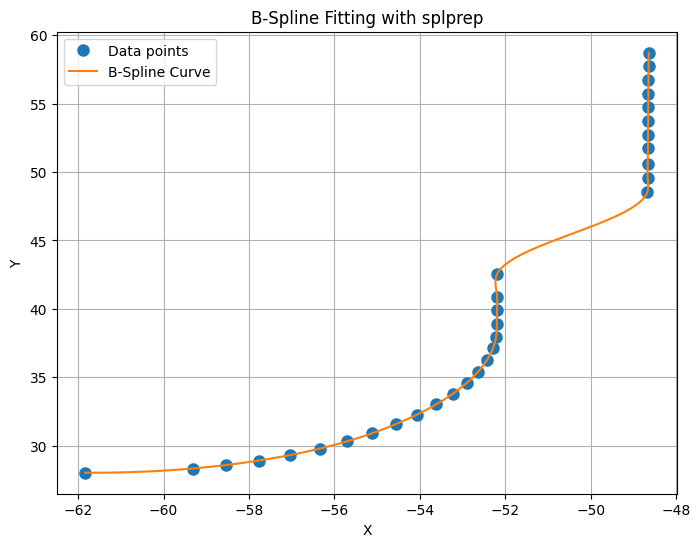

[-61.83589172 -59.32092667 -58.52777481 -57.76247406 -57.03193283
 -56.34273911 -55.70111465 -55.11284256 -54.56595612 -54.0645256
 -53.61802673 -53.22900772 -52.89969635 -52.6319809  -52.42738342
 -52.28708267 -52.21187973 -52.19707108 -52.19425583 -52.19144058
 -52.18673706 -52.18673706 -48.66986084 -48.66986084 -48.66704941
 -48.66423416 -48.66094208 -48.66094208 -48.65812683 -48.6553154
 -48.65250015 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[28.01222038 28.31806374 28.57391548 28.90386772 29.30494308 29.77351952
 30.30537415 30.89570618 31.55471611 32.26249695 33.00615311 33.78142929
 34.58388901 35.40894318 36.25187302 37.10784912 37.97198868 38.89096451
 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589
 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388
 54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951EF90>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10

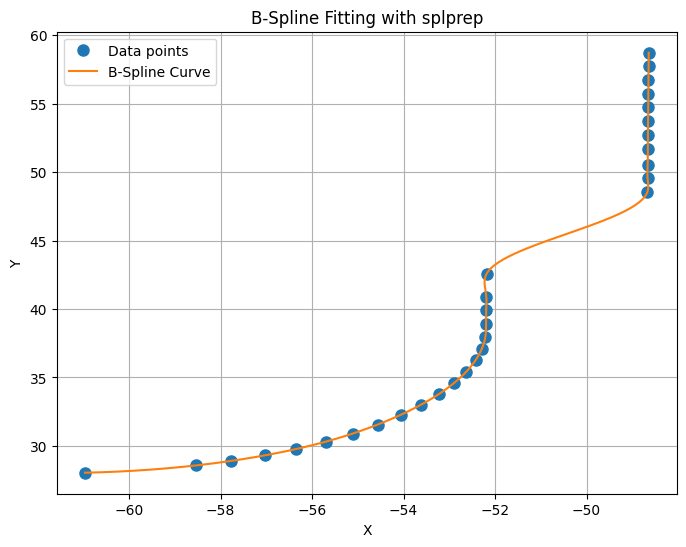

[-60.96198273 -58.52777481 -57.76247406 -57.03193283 -56.34273911
 -55.70111465 -55.11284256 -54.56595612 -54.0645256  -53.61802673
 -53.22900772 -52.89969635 -52.6319809  -52.42738342 -52.28708267
 -52.21187973 -52.19707108 -52.19425583 -52.19144058 -52.18673706
 -52.18673706 -48.66986084 -48.66986084 -48.66704941 -48.66423416
 -48.66094208 -48.66094208 -48.65812683 -48.6553154  -48.65250015
 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[28.03720093 28.57391548 28.90386772 29.30494308 29.77351952 30.30537415
 30.89570618 31.55471611 32.26249695 33.00615311 33.78142929 34.58388901
 35.40894318 36.25187302 37.10784912 37.97198868 38.89096451 39.89096069
 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208
 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117
 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E030>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 

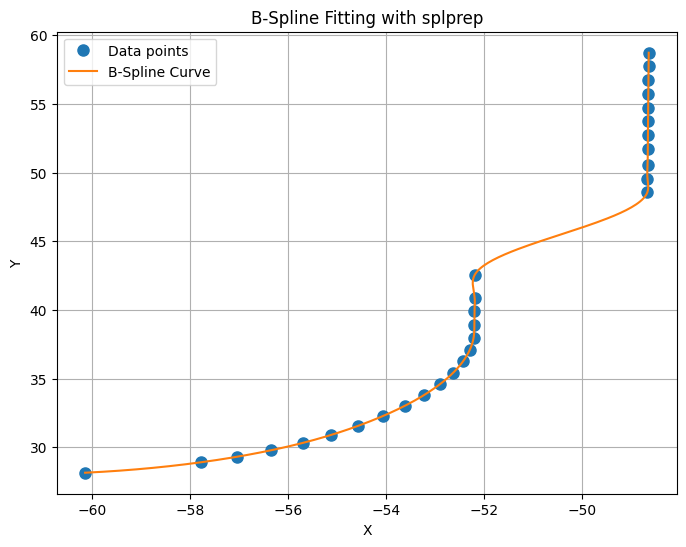

[-60.13477325 -57.76247406 -57.03193283 -56.34273911 -55.70111465
 -55.11284256 -54.56595612 -54.0645256  -53.61802673 -53.22900772
 -52.89969635 -52.6319809  -52.42738342 -52.28708267 -52.21187973
 -52.19707108 -52.19425583 -52.19144058 -52.18673706 -52.18673706
 -48.66986084 -48.66986084 -48.66704941 -48.66423416 -48.66094208
 -48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[28.13861847 28.90386772 29.30494308 29.77351952 30.30537415 30.89570618
 31.55471611 32.26249695 33.00615311 33.78142929 34.58388901 35.40894318
 36.25187302 37.10784912 37.97198868 38.89096451 39.89096069 40.89141464
 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826
 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117
 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E090>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 23 25 26
 27 28 

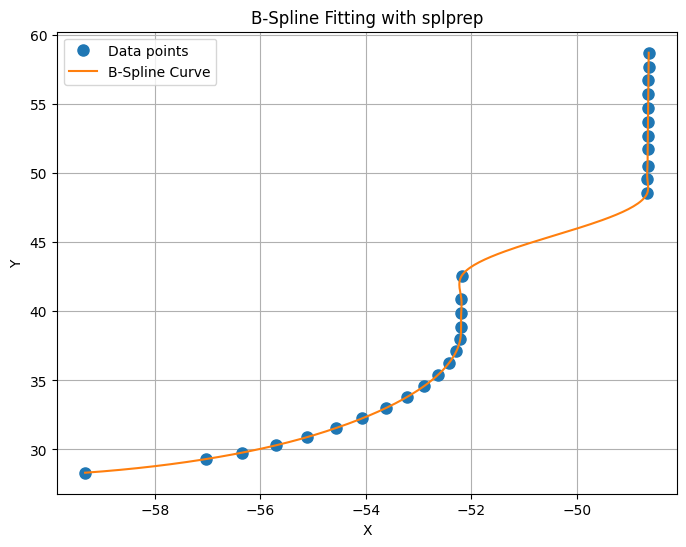

[-59.32092667 -57.03193283 -56.34273911 -55.70111465 -55.11284256
 -54.56595612 -54.0645256  -53.61802673 -53.22900772 -52.89969635
 -52.6319809  -52.42738342 -52.28708267 -52.21187973 -52.19707108
 -52.19425583 -52.19144058 -52.18673706 -52.18673706 -48.66986084
 -48.66986084 -48.66704941 -48.66423416 -48.66094208 -48.66094208
 -48.65812683 -48.6553154  -48.65250015 -48.64968491 -48.64687347
 -48.64405823 -48.64124298]
[28.31806374 29.30494308 29.77351952 30.30537415 30.89570618 31.55471611
 32.26249695 33.00615311 33.78142929 34.58388901 35.40894318 36.25187302
 37.10784912 37.97198868 38.89096451 39.89096069 40.89141464 42.56512833
 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643
 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354
 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E0F0>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 24 25 26
 27 28 29 30]


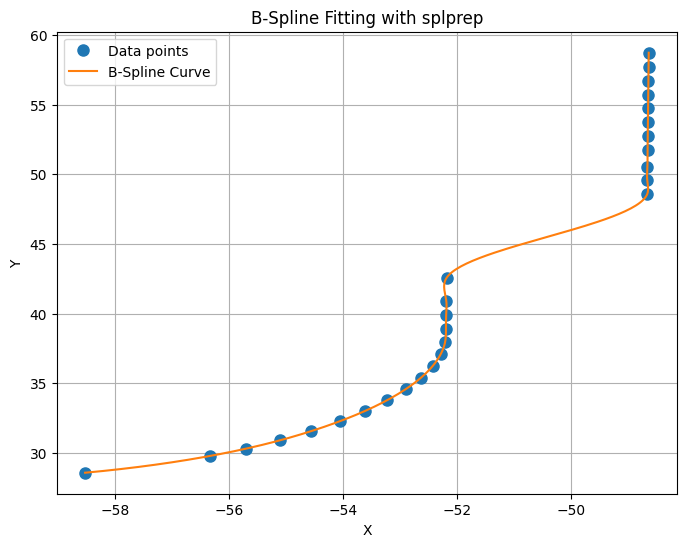

[-58.527771   -56.34273911 -55.70111465 -55.11284256 -54.56595612
 -54.0645256  -53.61802673 -53.22900772 -52.89969635 -52.6319809
 -52.42738342 -52.28708267 -52.21187973 -52.19707108 -52.19425583
 -52.19144058 -52.18673706 -52.18673706 -48.66986084 -48.66986084
 -48.66704941 -48.66423416 -48.66094208 -48.66094208 -48.65812683
 -48.6553154  -48.65250015 -48.64968491 -48.64687347 -48.64405823
 -48.64124298]
[28.57391548 29.77351952 30.30537415 30.89570618 31.55471611 32.26249695
 33.00615311 33.78142929 34.58388901 35.40894318 36.25187302 37.10784912
 37.97198868 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833
 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643
 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354 57.72522354
 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E150>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19 20 21 23 24 25 26
 27 28 29]


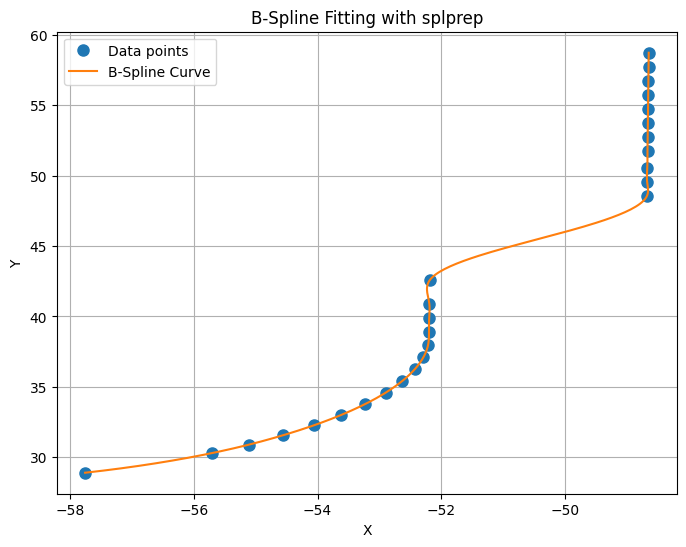

[-57.76247406 -55.70111465 -55.11284256 -54.56595612 -54.0645256
 -53.61802673 -53.22900772 -52.89969635 -52.6319809  -52.42738342
 -52.28708267 -52.21187973 -52.19707108 -52.19425583 -52.19144058
 -52.18673706 -52.18673706 -48.66986084 -48.66986084 -48.66704941
 -48.66423416 -48.66094208 -48.66094208 -48.65812683 -48.6553154
 -48.65250015 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[28.90386581 30.30537415 30.89570618 31.55471611 32.26249695 33.00615311
 33.78142929 34.58388901 35.40894318 36.25187302 37.10784912 37.97198868
 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589
 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388
 53.7252388  54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E1B0>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 19 20 22 23 24 25 26
 27 28]


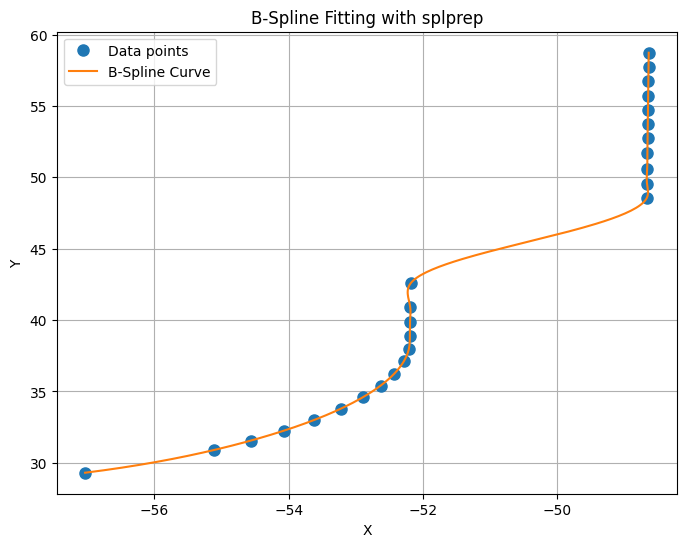

[-57.03193283 -55.11284256 -54.56595612 -54.0645256  -53.61802673
 -53.22900772 -52.89969635 -52.6319809  -52.42738342 -52.28708267
 -52.21187973 -52.19707108 -52.19425583 -52.19144058 -52.18673706
 -52.18673706 -48.66986084 -48.66986084 -48.66704941 -48.66423416
 -48.66094208 -48.66094208 -48.65812683 -48.6553154  -48.65250015
 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[29.30494308 30.89570618 31.55471611 32.26249695 33.00615311 33.78142929
 34.58388901 35.40894318 36.25187302 37.10784912 37.97198868 38.89096451
 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589
 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388
 54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E210>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 17 18 19 21 22 23 24 25 26
 27]


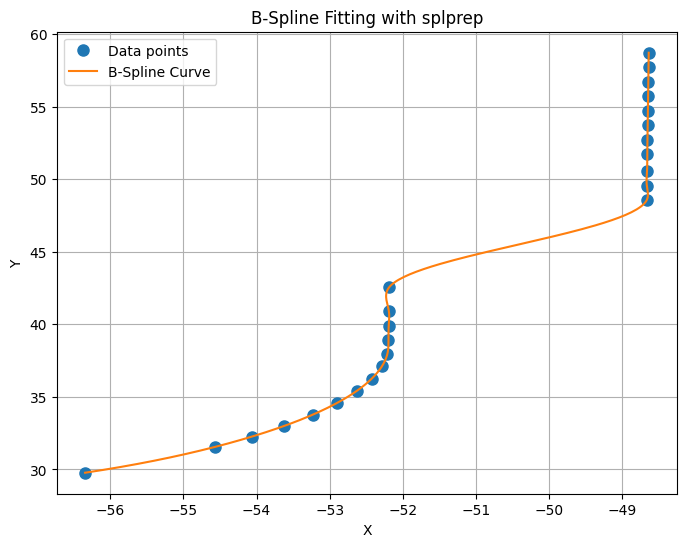

[-56.34273911 -54.56595612 -54.0645256  -53.61802673 -53.22900772
 -52.89969635 -52.6319809  -52.42738342 -52.28708267 -52.21187973
 -52.19707108 -52.19425583 -52.19144058 -52.18673706 -52.18673706
 -48.66986084 -48.66986084 -48.66704941 -48.66423416 -48.66094208
 -48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[29.77351952 31.55471611 32.26249695 33.00615311 33.78142929 34.58388901
 35.40894318 36.25187302 37.10784912 37.97198868 38.89096451 39.89096069
 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208
 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117
 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E270>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 16 17 18 20 21 22 23 24 25 26]


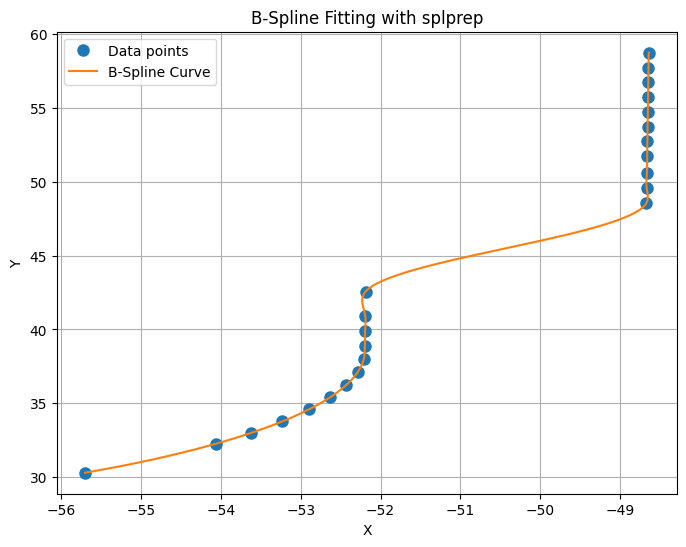

[-55.70111084 -54.0645256  -53.61802673 -53.22900772 -52.89969635
 -52.6319809  -52.42738342 -52.28708267 -52.21187973 -52.19707108
 -52.19425583 -52.19144058 -52.18673706 -52.18673706 -48.66986084
 -48.66986084 -48.66704941 -48.66423416 -48.66094208 -48.66094208
 -48.65812683 -48.6553154  -48.65250015 -48.64968491 -48.64687347
 -48.64405823 -48.64124298]
[30.30537224 32.26249695 33.00615311 33.78142929 34.58388901 35.40894318
 36.25187302 37.10784912 37.97198868 38.89096451 39.89096069 40.89141464
 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826
 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117
 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E2D0>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 15 16 17 19 20 21 22 23 24 25]


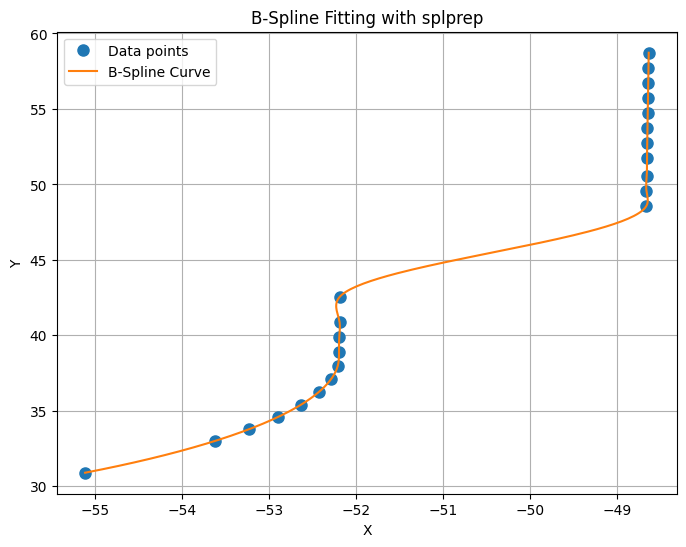

[-55.11283875 -53.61802673 -53.22900772 -52.89969635 -52.6319809
 -52.42738342 -52.28708267 -52.21187973 -52.19707108 -52.19425583
 -52.19144058 -52.18673706 -52.18673706 -48.66986084 -48.66986084
 -48.66704941 -48.66423416 -48.66094208 -48.66094208 -48.65812683
 -48.6553154  -48.65250015 -48.64968491 -48.64687347 -48.64405823
 -48.64124298]
[30.89570427 33.00615311 33.78142929 34.58388901 35.40894318 36.25187302
 37.10784912 37.97198868 38.89096451 39.89096069 40.89141464 42.56512833
 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643
 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354
 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E330>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 10 12 14 15 16 18 19 20 21 22 23 24]


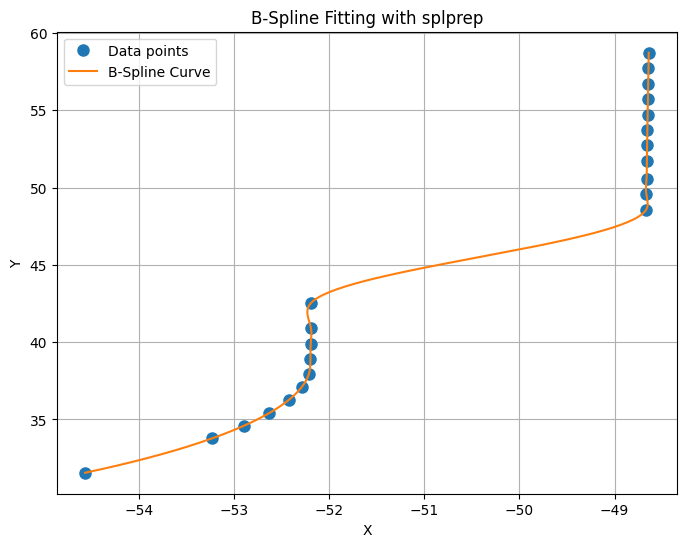

[-54.56595612 -53.22900772 -52.89969635 -52.6319809  -52.42738342
 -52.28708267 -52.21187973 -52.19707108 -52.19425583 -52.19144058
 -52.18673706 -52.18673706 -48.66986084 -48.66986084 -48.66704941
 -48.66423416 -48.66094208 -48.66094208 -48.65812683 -48.6553154
 -48.65250015 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[31.55471611 33.78142929 34.58388901 35.40894318 36.25187302 37.10784912
 37.97198868 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833
 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643
 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354 57.72522354
 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E390>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8  9 11 13 14 15 17 18 19 20 21 22 23]


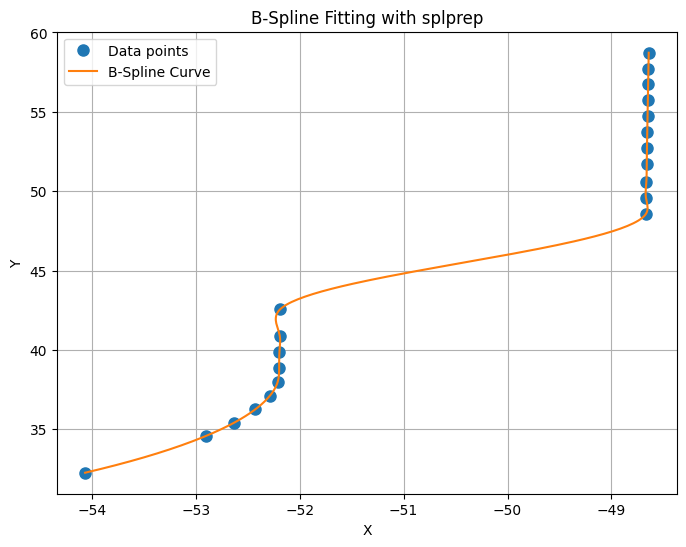

[-54.0645256  -52.89969635 -52.6319809  -52.42738342 -52.28708267
 -52.21187973 -52.19707108 -52.19425583 -52.19144058 -52.18673706
 -52.18673706 -48.66986084 -48.66986084 -48.66704941 -48.66423416
 -48.66094208 -48.66094208 -48.65812683 -48.6553154  -48.65250015
 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[32.26249695 34.58388901 35.40894318 36.25187302 37.10784912 37.97198868
 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589
 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388
 53.7252388  54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E3F0>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  8 10 12 13 14 16 17 18 19 20 21 22]


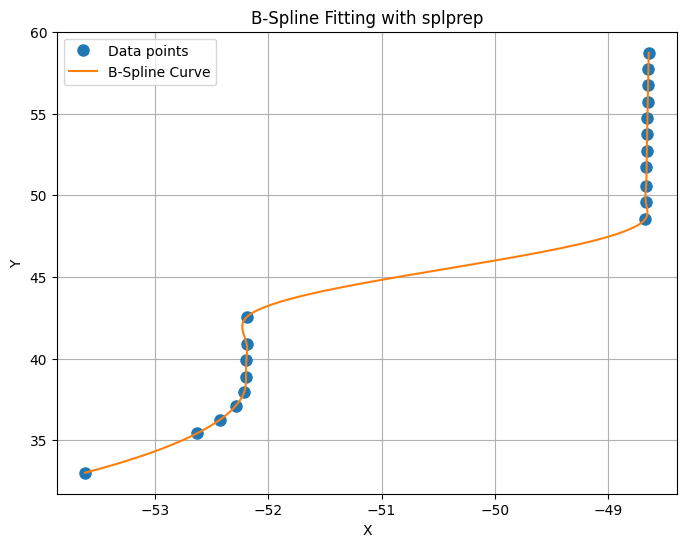

[-53.61802673 -52.6319809  -52.42738342 -52.28708267 -52.21187973
 -52.19707108 -52.19425583 -52.19144058 -52.18673706 -52.18673706
 -48.66986084 -48.66986084 -48.66704941 -48.66423416 -48.66094208
 -48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[33.00615311 35.40894318 36.25187302 37.10784912 37.97198868 38.89096451
 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589
 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388
 54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E450>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  7  9 11 12 13 15 16 17 18 19 20 21]


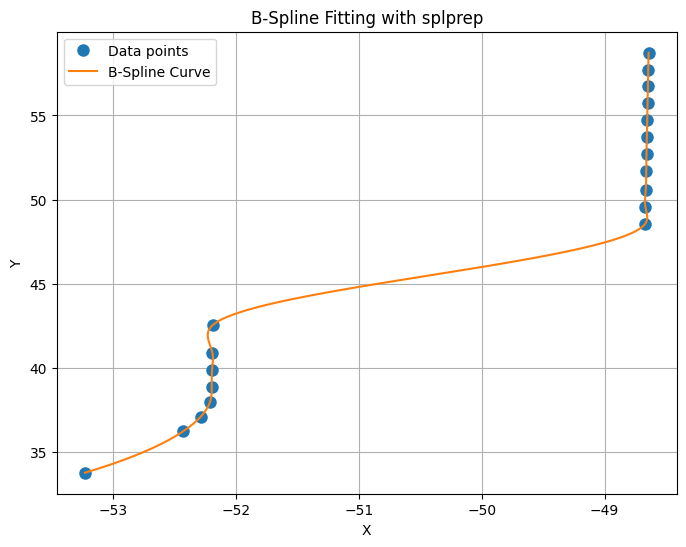

[-53.22900772 -52.42738342 -52.28708267 -52.21187973 -52.19707108
 -52.19425583 -52.19144058 -52.18673706 -52.18673706 -48.66986084
 -48.66986084 -48.66704941 -48.66423416 -48.66094208 -48.66094208
 -48.65812683 -48.6553154  -48.65250015 -48.64968491 -48.64687347
 -48.64405823 -48.64124298]
[33.78142929 36.25187302 37.10784912 37.97198868 38.89096451 39.89096069
 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208
 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117
 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5951E4B0>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  6  8 10 11 12 14 15 16 17 18 19 20]


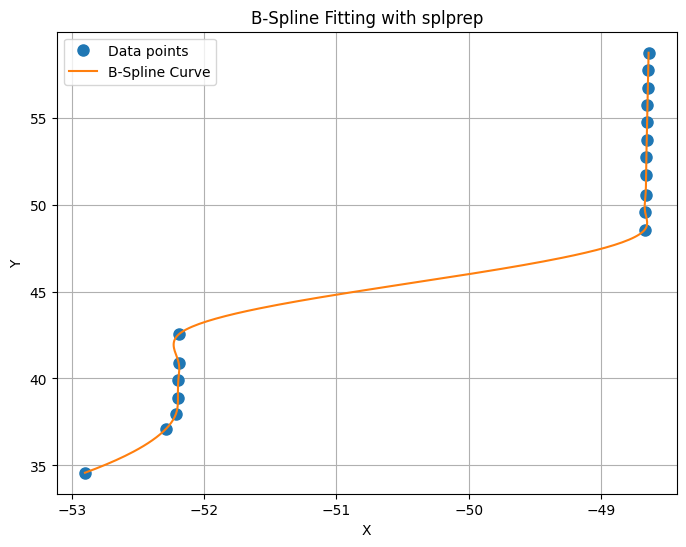

[-52.89969635 -52.28708267 -52.21187973 -52.19707108 -52.19425583
 -52.19144058 -52.18673706 -52.18673706 -48.66986084 -48.66986084
 -48.66704941 -48.66423416 -48.66094208 -48.66094208 -48.65812683
 -48.6553154  -48.65250015 -48.64968491 -48.64687347 -48.64405823
 -48.64124298]
[34.58388901 37.10784912 37.97198868 38.89096451 39.89096069 40.89141464
 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826
 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117
 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F59507030>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  5  7  9 10 11 13 14 15 16 17 18 19]


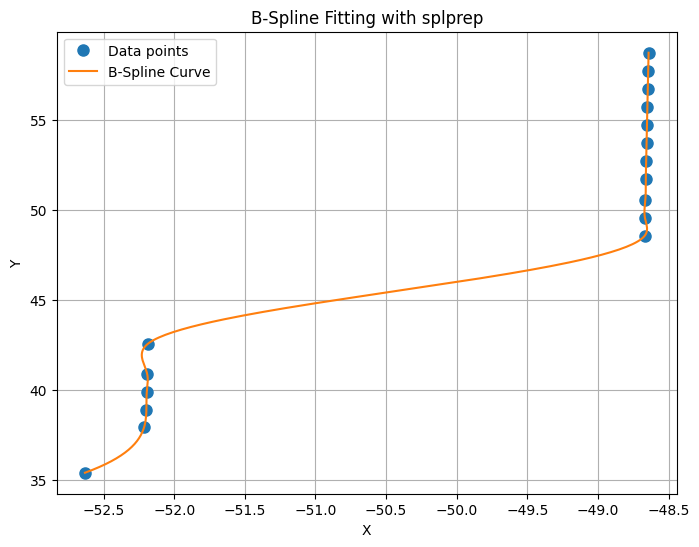

[-52.6319809  -52.21187973 -52.19707108 -52.19425583 -52.19144058
 -52.18673706 -52.18673706 -48.66986084 -48.66986084 -48.66704941
 -48.66423416 -48.66094208 -48.66094208 -48.65812683 -48.6553154
 -48.65250015 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[35.40894318 37.97198868 38.89096451 39.89096069 40.89141464 42.56512833
 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643
 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354
 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F59507090>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  4  6  8  9 10 12 13 14 15 16 17 18]


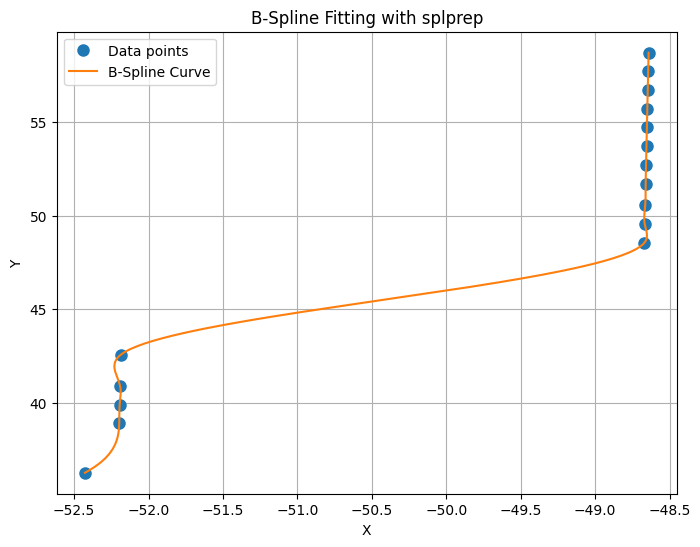

[-52.42738342 -52.19707108 -52.19425583 -52.19144058 -52.18673706
 -52.18673706 -48.66986084 -48.66986084 -48.66704941 -48.66423416
 -48.66094208 -48.66094208 -48.65812683 -48.6553154  -48.65250015
 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[36.25187302 38.89096451 39.89096069 40.89141464 42.56512833 42.56512833
 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643
 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354 57.72522354
 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F595070F0>, <RoadOption.RIGHT: 2>)
[ 0  1  2  3  5  7  8  9 11 12 13 14 15 16 17]


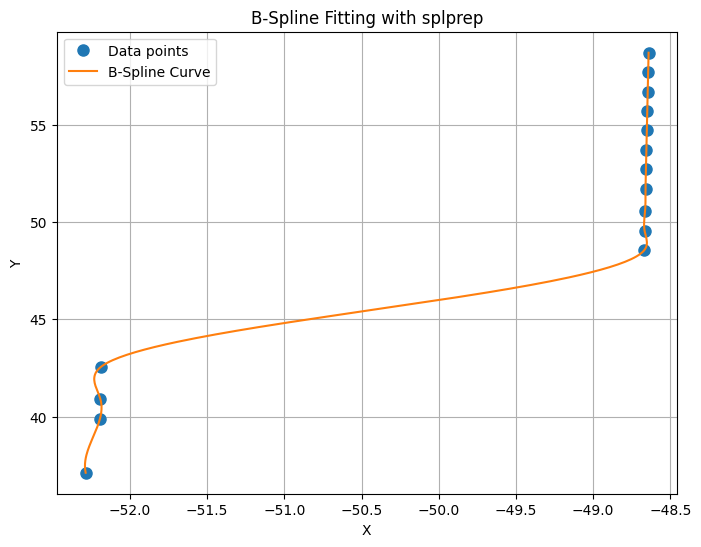

[-52.28708267 -52.19425583 -52.19144058 -52.18673706 -52.18673706
 -48.66986084 -48.66986084 -48.66704941 -48.66423416 -48.66094208
 -48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[37.10784912 39.89096069 40.89141464 42.56512833 42.56512833 48.55525589
 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388
 53.7252388  54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F59507150>, <RoadOption.RIGHT: 2>)
[ 0  1  2  4  6  7  8 10 11 12 13 14 15 16]


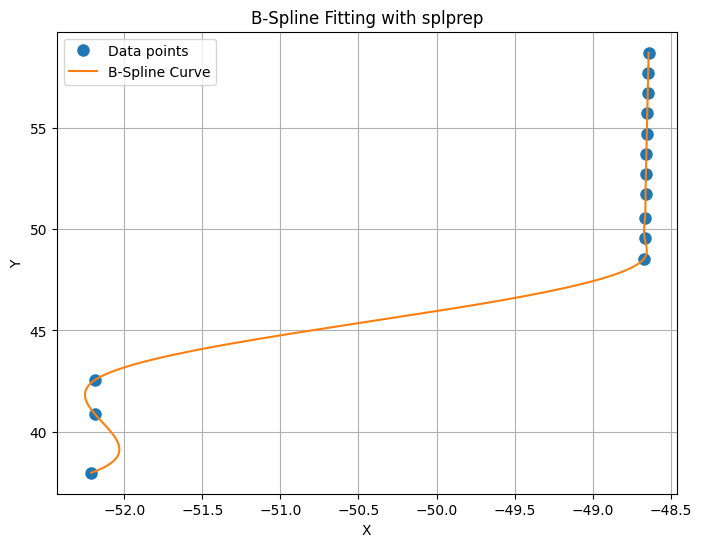

[-52.21187973 -52.19144058 -52.18673706 -52.18673706 -48.66986084
 -48.66986084 -48.66704941 -48.66423416 -48.66094208 -48.66094208
 -48.65812683 -48.6553154  -48.65250015 -48.64968491 -48.64687347
 -48.64405823 -48.64124298]
[37.97198868 40.89141464 42.56512833 42.56512833 48.55525589 48.55525589
 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388
 54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F595071B0>, <RoadOption.RIGHT: 2>)
[ 0  1  3  5  6  7  9 10 11 12 13 14 15]


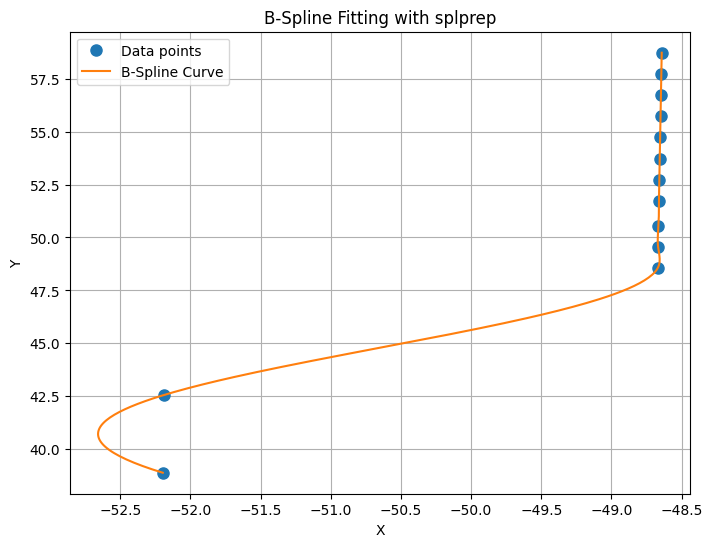

[-52.19706726 -52.18673706 -52.18673706 -48.66986084 -48.66986084
 -48.66704941 -48.66423416 -48.66094208 -48.66094208 -48.65812683
 -48.6553154  -48.65250015 -48.64968491 -48.64687347 -48.64405823
 -48.64124298]
[38.89096451 42.56512833 42.56512833 48.55525589 48.55525589 49.55525208
 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117
 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F59507210>, <RoadOption.RIGHT: 2>)
[ 0  1  2  4  5  6  8  9 10 11 12 13 14]


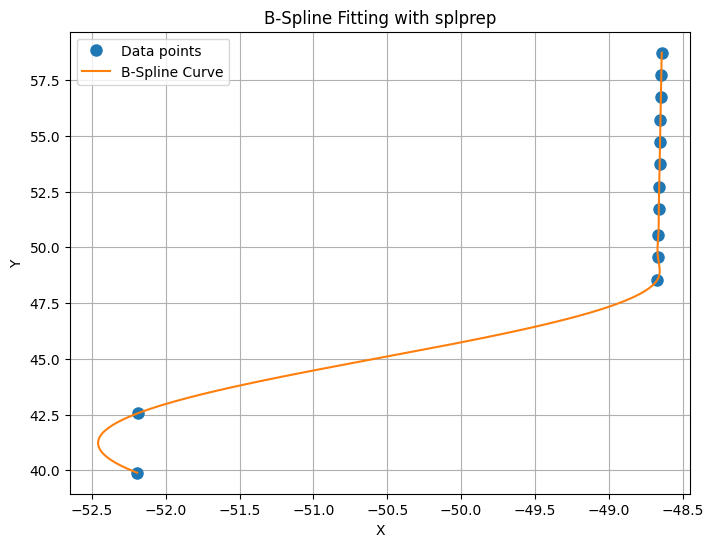

[-52.19425583 -52.18673706 -48.66986084 -48.66986084 -48.66704941
 -48.66423416 -48.66094208 -48.66094208 -48.65812683 -48.6553154
 -48.65250015 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[39.89096069 42.56512833 48.55525589 48.55525589 49.55525208 50.55524826
 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117
 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F59864C30>, <RoadOption.RIGHT: 2>)
[ 0  1  3  4  5  7  8  9 10 11 12 13]


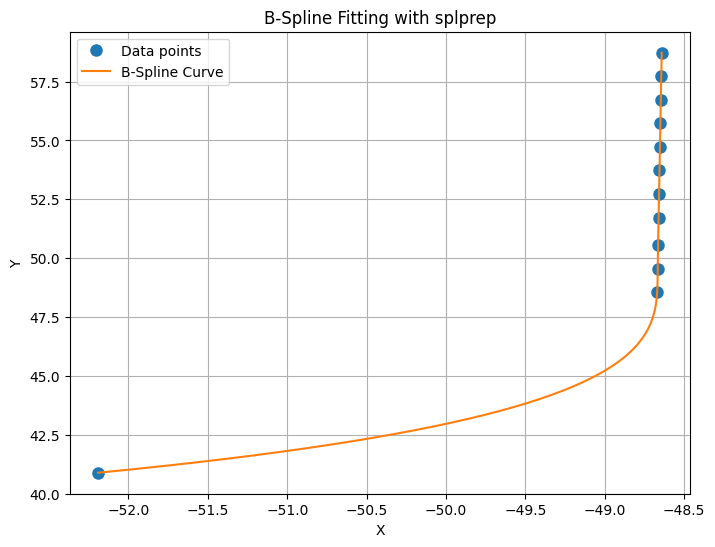

[-52.19144058 -48.66986084 -48.66986084 -48.66704941 -48.66423416
 -48.66094208 -48.66094208 -48.65812683 -48.6553154  -48.65250015
 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[40.89141083 48.55525589 48.55525589 49.55525208 50.55524826 51.72524643
 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354
 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F59864C30>, <RoadOption.CHANGELANELEFT: 5>)
[ 0  1  2  3  4  6  7  8  9 10 11 12]


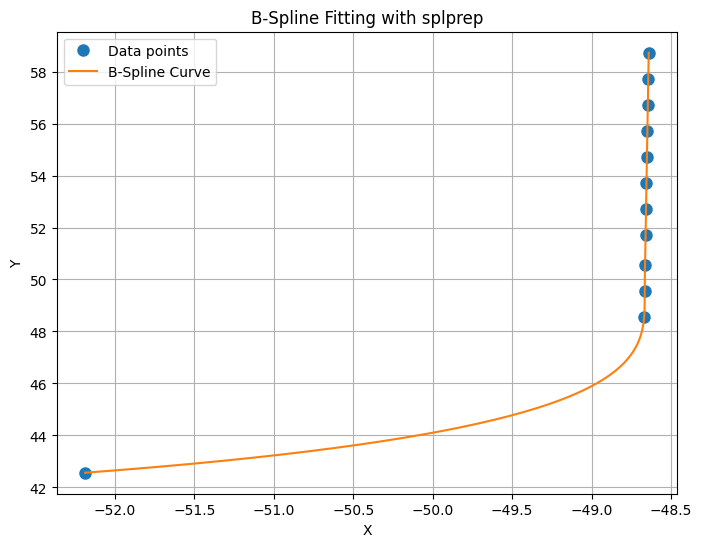

[-52.18673706 -48.66986084 -48.66704941 -48.66423416 -48.66094208
 -48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[42.56512451 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643
 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354 57.72522354
 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F595138D0>, <RoadOption.CHANGELANELEFT: 5>)
[ 0  1  2  3  4  6  7  8  9 10 11 12]


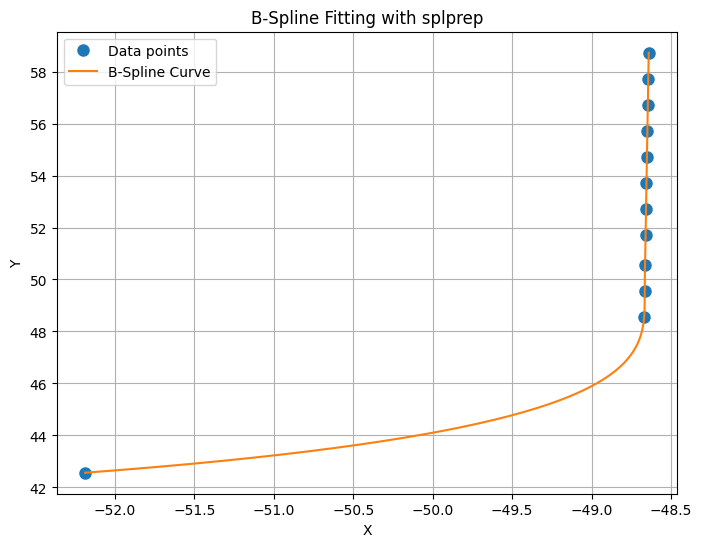

[-52.18673706 -48.66986084 -48.66704941 -48.66423416 -48.66094208
 -48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[42.56512451 48.55525589 49.55525208 50.55524826 51.72524643 51.72524643
 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354 57.72522354
 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F595138D0>, <RoadOption.LANEFOLLOW: 4>)
[ 0  1  2  3  5  6  7  8  9 10 11]


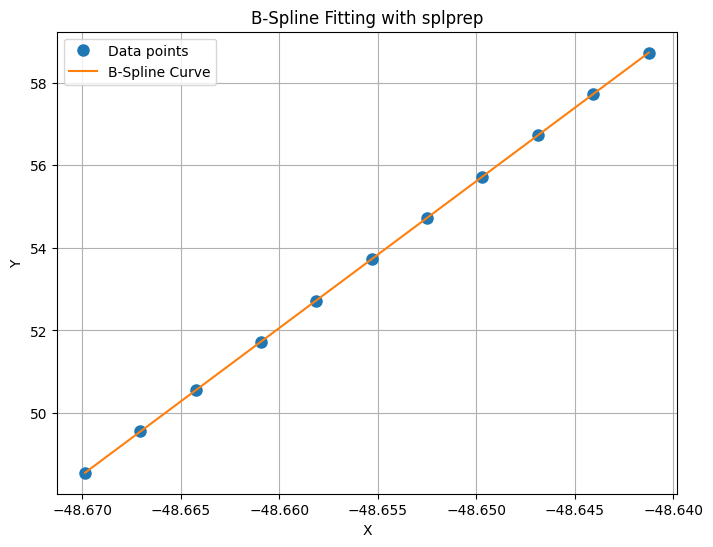

[-48.66986084 -48.66704941 -48.66423416 -48.66094208 -48.66094208
 -48.65812683 -48.6553154  -48.65250015 -48.64968491 -48.64687347
 -48.64405823 -48.64124298]
[48.55525208 49.55525208 50.55524826 51.72524643 51.72524643 52.7252388
 53.7252388  54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F595131B0>, <RoadOption.LANEFOLLOW: 4>)
[ 0  1  2  4  5  6  7  8  9 10]


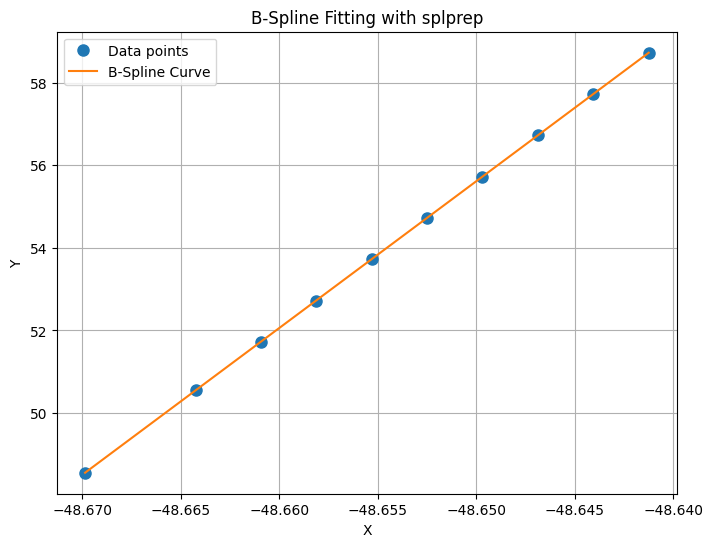

[-48.66986084 -48.66423416 -48.66094208 -48.66094208 -48.65812683
 -48.6553154  -48.65250015 -48.64968491 -48.64687347 -48.64405823
 -48.64124298]
[48.55525208 50.55524826 51.72524643 51.72524643 52.7252388  53.7252388
 54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F59513090>, <RoadOption.LANEFOLLOW: 4>)
[0 1 3 4 5 6 7 8 9]


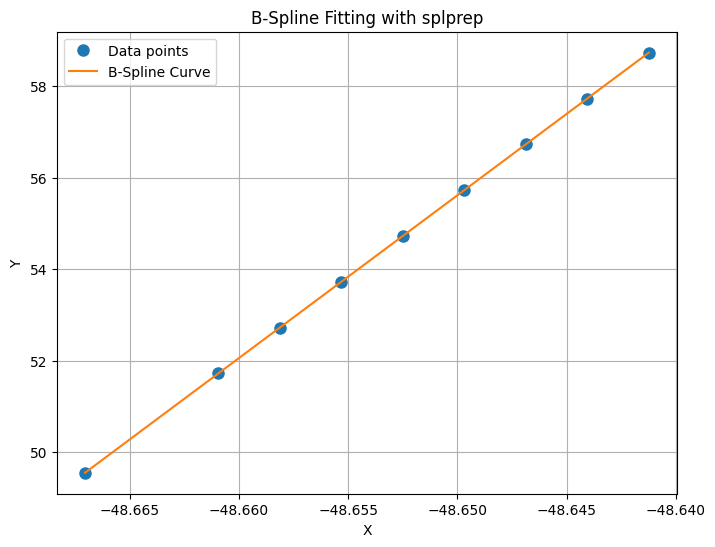

[-48.66704941 -48.66094208 -48.66094208 -48.65812683 -48.6553154
 -48.65250015 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[49.55525208 51.72524643 51.72524643 52.7252388  53.7252388  54.72523117
 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F5AA0BDB0>, <RoadOption.LANEFOLLOW: 4>)
[0 1 2 3 4 5 6 7 8]


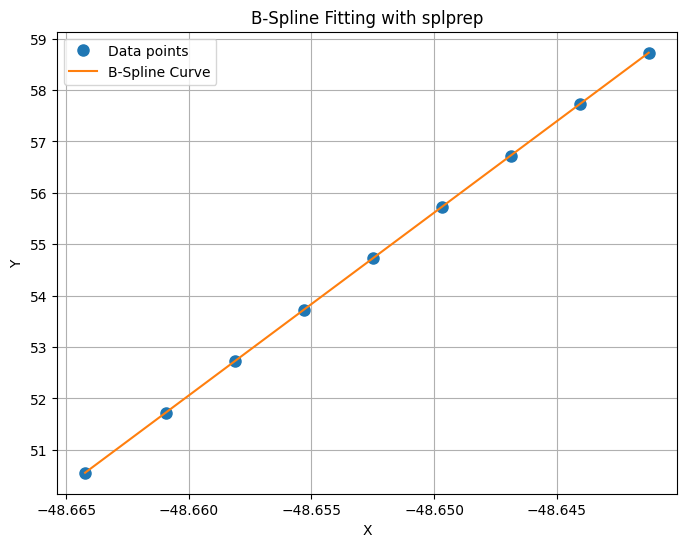

[-48.66423416 -48.66094208 -48.65812683 -48.6553154  -48.65250015
 -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[50.55524826 51.72524643 52.7252388  53.7252388  54.72523117 55.72523117
 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F582F39F0>, <RoadOption.STRAIGHT: 3>)
[0 1 2 3 4 5 6 7]


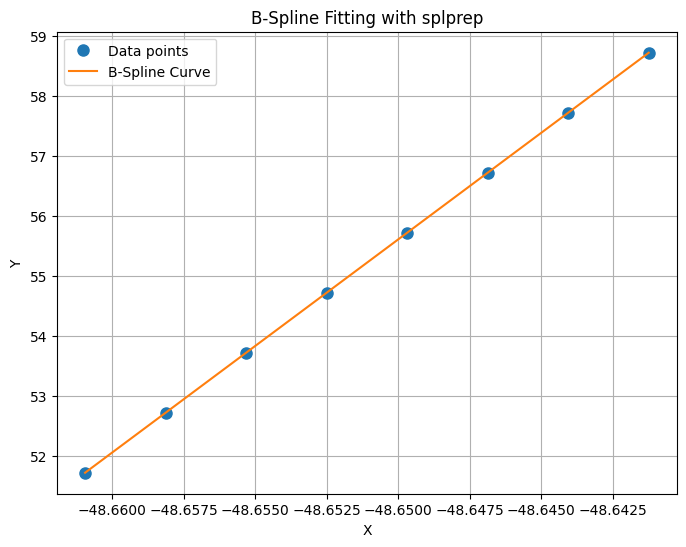

[-48.66094208 -48.65812683 -48.6553154  -48.65250015 -48.64968491
 -48.64687347 -48.64405823 -48.64124298]
[51.72524261 52.7252388  53.7252388  54.72523117 55.72523117 56.72522354
 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F583DBA50>, <RoadOption.STRAIGHT: 3>)
[0 1 2 3 4 5 6]


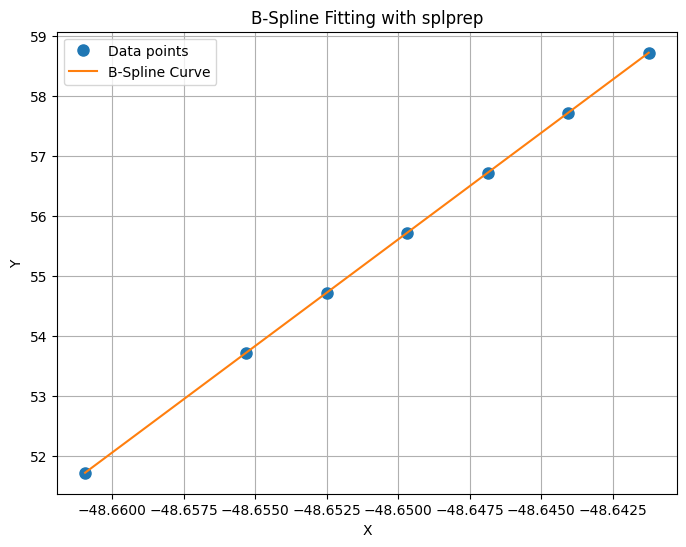

[-48.66094208 -48.6553154  -48.65250015 -48.64968491 -48.64687347
 -48.64405823 -48.64124298]
[51.72524261 53.7252388  54.72523117 55.72523117 56.72522354 57.72522354
 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F583EE510>, <RoadOption.STRAIGHT: 3>)
[0 1 2 3 4 5]


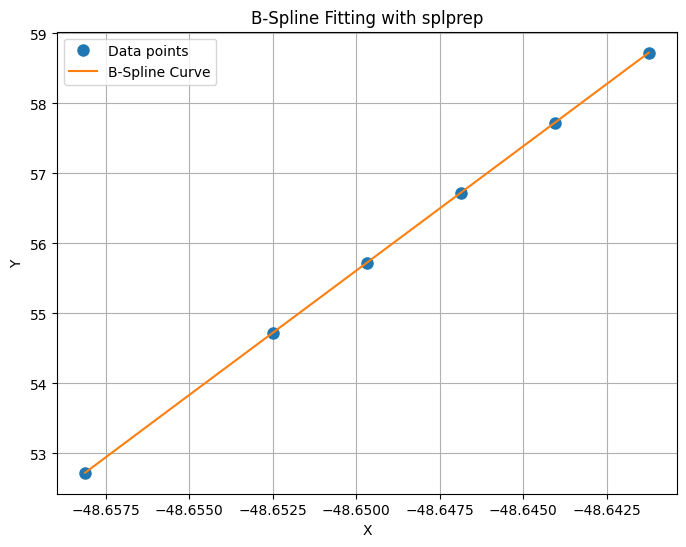

[-48.65812302 -48.65250015 -48.64968491 -48.64687347 -48.64405823
 -48.64124298]
[52.7252388  54.72523117 55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F583EEF90>, <RoadOption.STRAIGHT: 3>)
[0 1 2 3 4]


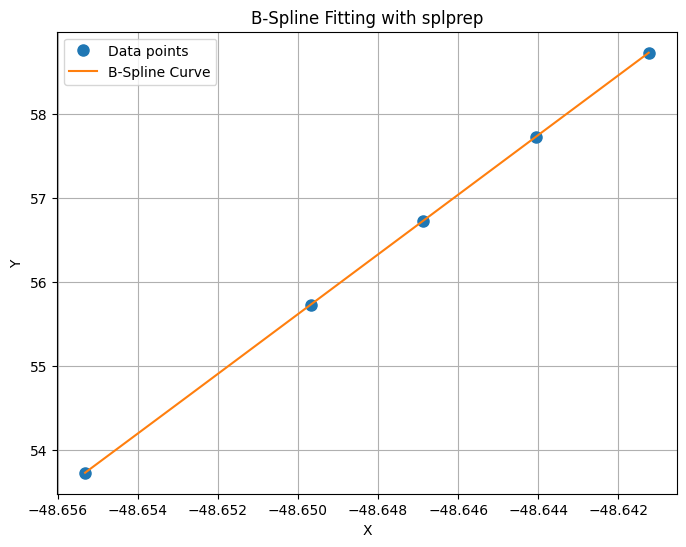

[-48.6553154  -48.64968491 -48.64687347 -48.64405823 -48.64124298]
[53.7252388  55.72523117 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F583FB0F0>, <RoadOption.STRAIGHT: 3>)
[0 1 2 3]


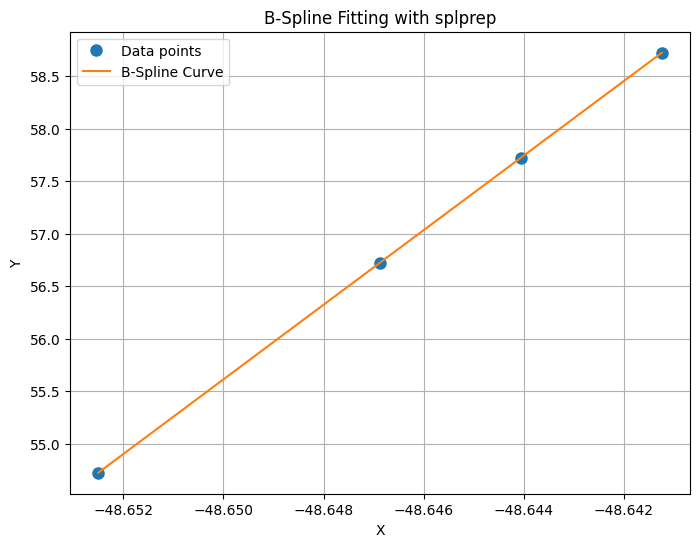

[-48.65250015 -48.64687347 -48.64405823 -48.64124298]
[54.72522736 56.72522354 57.72522354 58.72521591]
(<carla.libcarla.Waypoint object at 0x0000017F583FB150>, <RoadOption.STRAIGHT: 3>)
[0 1 2]


TypeError: m > k must hold

In [84]:
lookforward = 5

currentwaypoint = 1

for gowaypoint in route:
    if vehicle.get_transform().location.distance(route[currentwaypoint][0].transform.location) < 3:
            currentwaypoint += 1
    print(gowaypoint)
    vehicle.set_transform(gowaypoint[0].transform)
    

    X = []
    Y = []

    cal_coute = route[currentwaypoint+1:len(route) - lookforward+currentwaypoint]
    vehicle_pos = vehicle.get_transform()
    carx = vehicle_pos.location.x
    cary = vehicle_pos.location.y
    X.append(carx)
    Y.append(cary)
    for point in cal_coute:
        x = point[0].transform.location.x
        y = point[0].transform.location.y
        X.append(x)
        Y.append(y)


    X = np.array(X)
    Y = np.array(Y)
    unique_indices = np.unique(X, return_index=True)[1]
    print(unique_indices)
    x_unique = X[unique_indices]
    y_unique = Y[unique_indices]
    sorted_indices = np.argsort(x_unique)
    x_sorted = x_unique[sorted_indices]
    y_sorted = y_unique[sorted_indices]

    tck, u = splprep([x_sorted, y_sorted], s=0)

    # Generate new interpolated points
    u_new = np.linspace(0, 1, 300)
    x_new, y_new = splev(u_new, tck)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(x_sorted, y_sorted, 'o', label='Data points', markersize=8)
    plt.plot(x_new, y_new, '-', label='B-Spline Curve')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('B-Spline Fitting with splprep')
    plt.legend()
    plt.grid()
    plt.show()
    print(X)
    print(Y)
    time.sleep(1)
    
    